 # СБОРНЫЙ ПРОЕКТ
 

# Описание проекта

## Основная задача: 
Исходя их открытых данных об играх, необходимо выявить определяющие успешность игры закономерности.

## Цель:
На основании проведенного анализа можно будет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
data = pd.read_csv('./games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Из первичного анализа можно сделать выводы:
- в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating наблюдаются пропущенные значения, необходимо изучить детально данные и заменить пропуски, где это возможно, либо удалить их, если их количество не имеет критического значения;
- необходимо все столбцы привести к единому регистру;
- в столбцах User_Score и  Year_of_Release необходимо изменить тип данных.

## Шаг 2. Подготовка данных

### Приведение названия столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Замена или устранение пропущенных значений

#### Устранение пропущенных значений в столбцах name и genre

In [7]:
data[(data['name'].isna())|(data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
data = data[data['name'].isna() == False]

In [9]:
val_nan = len(data[(data['name'].isna())|(data['genre'].isna())])
print(f'Количество строк Nan значением столбца name или genre {val_nan}')

Количество строк Nan значением столбца name или genre 0


Прежде проверила совпадают ли пропущенные значения в столбцах name и genre. Так как в них равно количество пропущенных значений - 2, то если записи с пропущенными значениями совпадают, то можно безболезнено удалить их из таблицы.

#### Устранение пропущенных значений в столбцах year_of_release

In [10]:
print(data['year_of_release'].isna().sum())

269


Устранение пропущенных значений в столбце year_of_release будем выполнять в 2 этапа:
1) У некоторых игр в конце названия указан год выхода. Его можно использовать, взяв последние 4 символы из названия игры и переведя их в число. После этого нао будет проверить дату на принадлежность временному промежутку таблицы: 1980 - 2016.

2) Так как игровые платформы отличаются по годам выхода и годам выхода их использвания, то в качестве приблизительного значения можно использовать медиану по платформе.

In [11]:
data['year_of_release'].min()

1980.0

In [12]:
data['year_of_release'].max()

2016.0

In [13]:
def get_num_from_end(df):
    name_len = len(df['name'])
    name_len_4 = name_len - 4
    name = df['name']
    df_end = name[name_len_4:name_len]
    try:
        df_end = float(df_end)
        if (df_end >= 1980) and (df_end <= 2016):
            return df_end
        else:
            return None
    except:
        return None

data['year_name'] = data.apply(get_num_from_end, axis=1).astype('float64')

In [14]:
data.loc[data['year_of_release'].isna(), 'year_of_release'] = data.loc[data['year_of_release'].isna(), 'year_name']
data = data.drop(columns='year_name', axis=0)
print(data['year_of_release'].isna().sum())

254


In [15]:
for plat in data['platform'].unique():
    median_yr = round(data.loc[data['platform'] == plat, 'year_of_release'].median(),0)
    data.loc[(data['platform'] == plat)&(data['year_of_release'].isna()), 'year_of_release'] = median_yr

In [16]:
print(data['year_of_release'].isna().sum())

0


#### Устранение пропущенных значений в столбцах critic_score, user_score

In [17]:
data['critic_score'].isna().sum() 
#data[data['critic_score'].isna()]

8576

In [18]:
data['user_score'].isna().sum() 
#data[data['user_score'].isna()]

6699

In [19]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2424

Доля пропущенных значений слишком велика, чтобы их просто исключить. 

Отдельно стоит рассмотреть значение столбца user_score равное 'tbd'. Аббревиатура 'tbd' обозначает, что оценка еще не определена. Я не совсем понимаю, чем это отличается от просто пропущеного значению, поэтому предлагаю просто заменить его на None. И после этого изменить тип на float.

In [20]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None
data['user_score'] = data['user_score'].astype('float64', errors='ignore')

In [21]:
data['user_score'].isna().sum() 
#data[data['user_score'].isna()]

9123

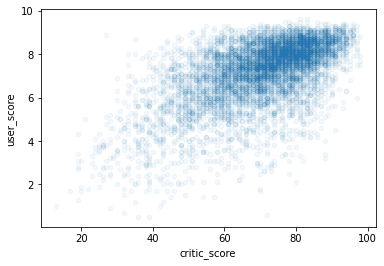

In [22]:
data.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.05);

In [23]:
data['user_score'].corr(data['critic_score'])

0.580877832076724

Значение коэффициента корреляции Пирсона для значений user_score и critic_score составлят 0.58. Это означает довольно высокий уровень взаимосвязи между двумя переменными. Также это можно увдеть на графике - у игр с высокими оценками критиков как правило высокие оценки польователей. 

Тогда можно устранить часть пропусков, используя следующую логику - для пропущенных оценок пользователей берем существующие оценки критиков, поделенное на 10, а для пропущенных оценко критиков берем существующие оценки пользователей, умноженные на 10. 

In [24]:
data.loc[data['user_score'].isna(), 'user_score'] = data.loc[data['user_score'].isna(), 'critic_score']/10
data.loc[data['critic_score'].isna(), 'critic_score'] = data.loc[data['critic_score'].isna(), 'user_score']*10

In [25]:
data['critic_score'].isna().sum() 

8003

In [26]:
data['user_score'].isna().sum() 

8003

<AxesSubplot:xlabel='critic_score', ylabel='user_score'>

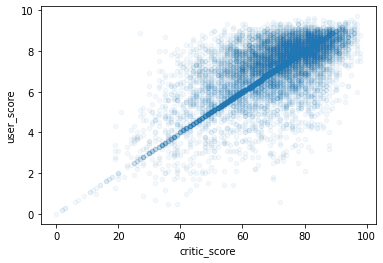

In [27]:
data.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.05)

In [28]:
data['critic_score'].corr(data['user_score'])

0.6868869982880539

Посчитала, что оставшиеся пропущенные значения не надо менять. Сам факт отсутствия оценки как пользовательской, так и критиков, тоже имеет значение.

#### Устранение пропущенных значений в столбцах rating

В рейтинге ESRB существует маркировка RP, означающая категория ещё не присвоена. Тогда, для всех пропущенных значений столбца <i>raitng</i> решила поставить значений 'RP'.

In [29]:
data['rating'].isna().sum() 

6764

In [30]:
data.groupby('rating')['name'].count()

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: name, dtype: int64

In [31]:
data.loc[data['rating'].isna(), 'rating'] = 'RP'

In [32]:
data['rating'].isna().sum() 

0

In [33]:
data.groupby('rating')['name'].count()

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP      6767
T       2961
Name: name, dtype: int64

### Изменение типов полей

Изменение типов полей потребовалось только для поля <i>years_of_release</i>, так как тип поля <i>user_score</i> был изменем во время устраненя пропущенных значений.

In [34]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8710 non-null   float64
 9   user_score       8710 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Устранение дубликатов

Необходимо проверить наличие дубликатов в данных. Так как игры могут обновляться, или выходить на разных платформах, то будем искать дубликаты на уровне Игра - Платформа - Год выпуска. 

In [36]:
data['name'].duplicated().sum()
data[data[['name', 'platform', 'year_of_release']].duplicated()][['name', 'platform', 'year_of_release']]

,name,platform,year_of_release
16230,Madden NFL 13,PS3,2012


In [37]:
data[(data['name'] == 'Madden NFL 13')&(data['platform'] == 'PS3')&(data['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Имеется одна задублированная запись. При этом, судя по тому, что все поля кроме продаж имеют одинаковые значения, то корректнее всего будет суммировать данные по продажам. Для этого используем функцию groupby.

In [38]:
agg_func = {'genre' : 'max', 
            'na_sales' : 'sum', 
            'eu_sales' : 'sum', 
            'jp_sales' : 'sum', 
            'other_sales' : 'sum', 
            'critic_score' : 'max', 
            'user_score' : 'max', 
            'rating' : 'max'}
data = data.groupby(['name', 'platform', 'year_of_release']).agg(agg_func).reset_index()

In [39]:
len(data[data[['name', 'platform', 'year_of_release']].duplicated()][['name', 'platform', 'year_of_release']])

0

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8709 non-null   float64
 9   user_score       8709 non-null   float64
 10  rating           16712 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Добавление суммарных продаж по всем регионам

In [41]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8709 non-null   float64
 9   user_score       8709 non-null   float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [43]:
print(f'Доля исключенных данных из таблицы составляет {round((1 - len(data)/16714)*100,2)}%')

Доля исключенных данных из таблицы составляет 0.01%


Общий вывод:
В ходе подготовки данных были выполнены следующие действия:
- названия столбцоы были приведены к единому регистру - названия состоят только из строчных букв;
- были полностью устранены пропущенные значения в колонках name, year_of_Release, genre, rating;
- были частично устранены пропущенные значения в столбцах critic_score, user_score;
- были изменены типы столбцоы <i>year_of_release</i> на int и <i>user_score</i> на float;
- общая доля исключенных записей составляет 0,01%, что является допустимым количеством;
- добавлено поле <i>total_sales</i> - содержащее суммарные продажи по всем регионам.

## Шаг 3. Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


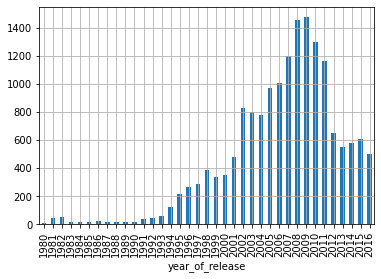

In [44]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True);

In [45]:
cnt = pd.DataFrame({'cnt': data.groupby('genre')['name'].count().sort_values(ascending=False)})
cnt_sum = data['name'].count()
cnt['cnt_part'] = cnt['cnt']/cnt_sum
cnt

,cnt,cnt_part
genre,,
Action,3369,0.20
Sports,2347,0.14
Misc,1750,0.10
Role-Playing,1498,0.09
Shooter,1323,0.08
Adventure,1303,0.08
Racing,1249,0.07
Platform,888,0.05
Simulation,873,0.05


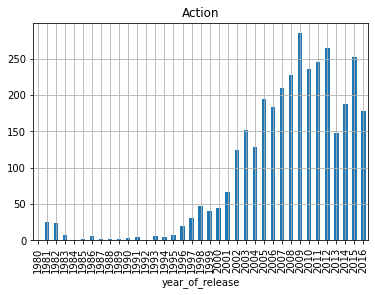

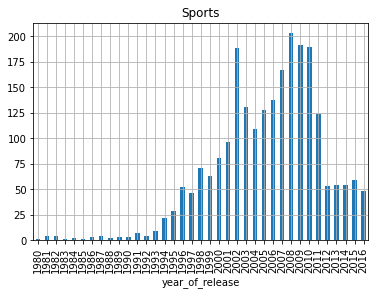

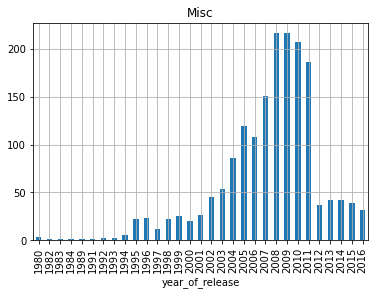

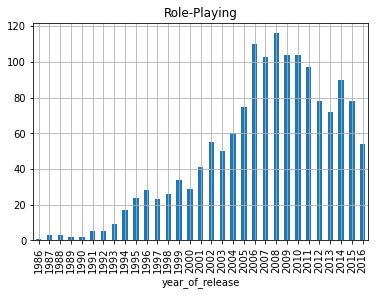

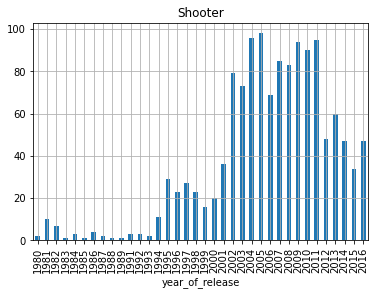

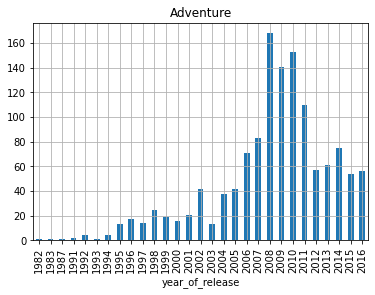

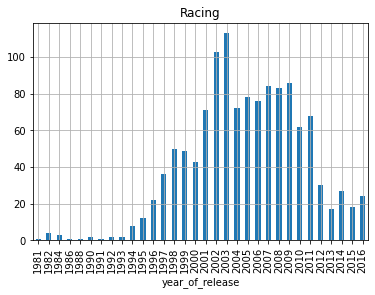

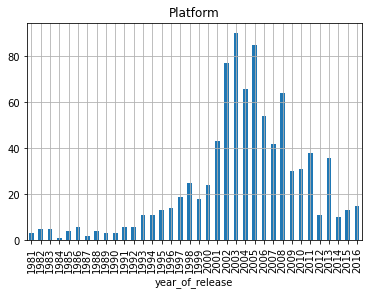

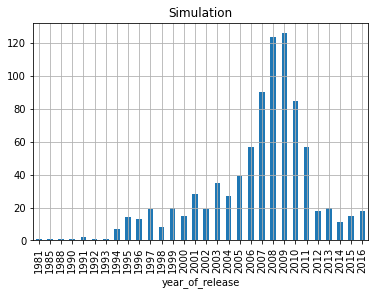

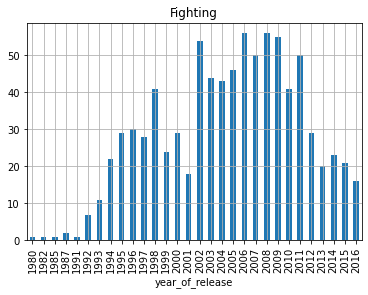

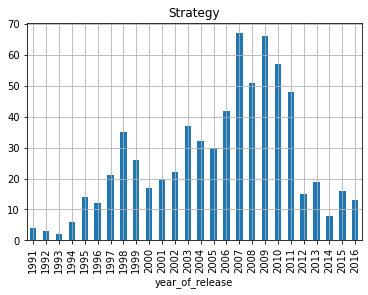

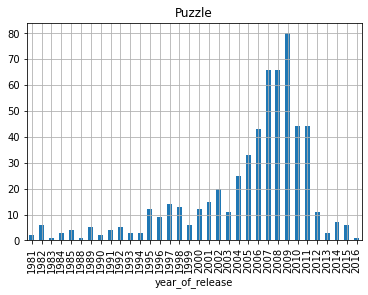

In [46]:
data[data['genre'] == 'Action'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Action');
plt.show()
data[data['genre'] == 'Sports'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Sports');
plt.show()
data[data['genre'] == 'Misc'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Misc');
plt.show()
data[data['genre'] == 'Role-Playing'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Role-Playing');
plt.show()
data[data['genre'] == 'Shooter'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Shooter');
plt.show()
data[data['genre'] == 'Adventure'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Adventure');
plt.show()
data[data['genre'] == 'Racing'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Racing');
plt.show()
data[data['genre'] == 'Platform'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Platform');
plt.show()
data[data['genre'] == 'Simulation'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Simulation');
plt.show()
data[data['genre'] == 'Fighting'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Fighting');
plt.show()
data[data['genre'] == 'Strategy'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Strategy');
plt.show()
data[data['genre'] == 'Puzzle'].groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, title = 'Puzzle');

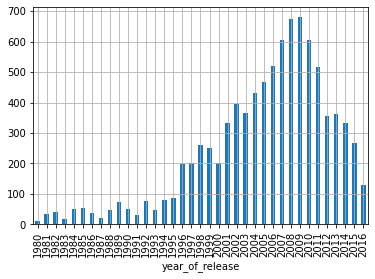

In [47]:
data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True);

Наблюдается резкий рост количества игр примерно с 1990 до 2009 года. После этого наблюдается спад, который более-менее сохраняется с 2012 по 2016. Если смотреть отдельно по жанрам - данное спад наблюдается на всех жанрах, кроме жанров Action и Role-Playing, в меньше степени на Shooter. Особенно сильно на спад влияют такие жанры как Sport, Misc, Adventure - количество таких игр в разы сократилось. Дальнейший анализ - по количеству игр на платформах - продолжим в следующем пункте.

В общем случае, для дальнейшего анализа можно использовать только периоды 2012-2015, так как динамика продаж за предыдущие периоды сильно отличается и может оказывать негативное влияние на итоговые результаты. 2016 год исключается, так как игры, выпущенные в этот год еще не набрали значимый объем продаж, что хорош видно на гистограмме выше.

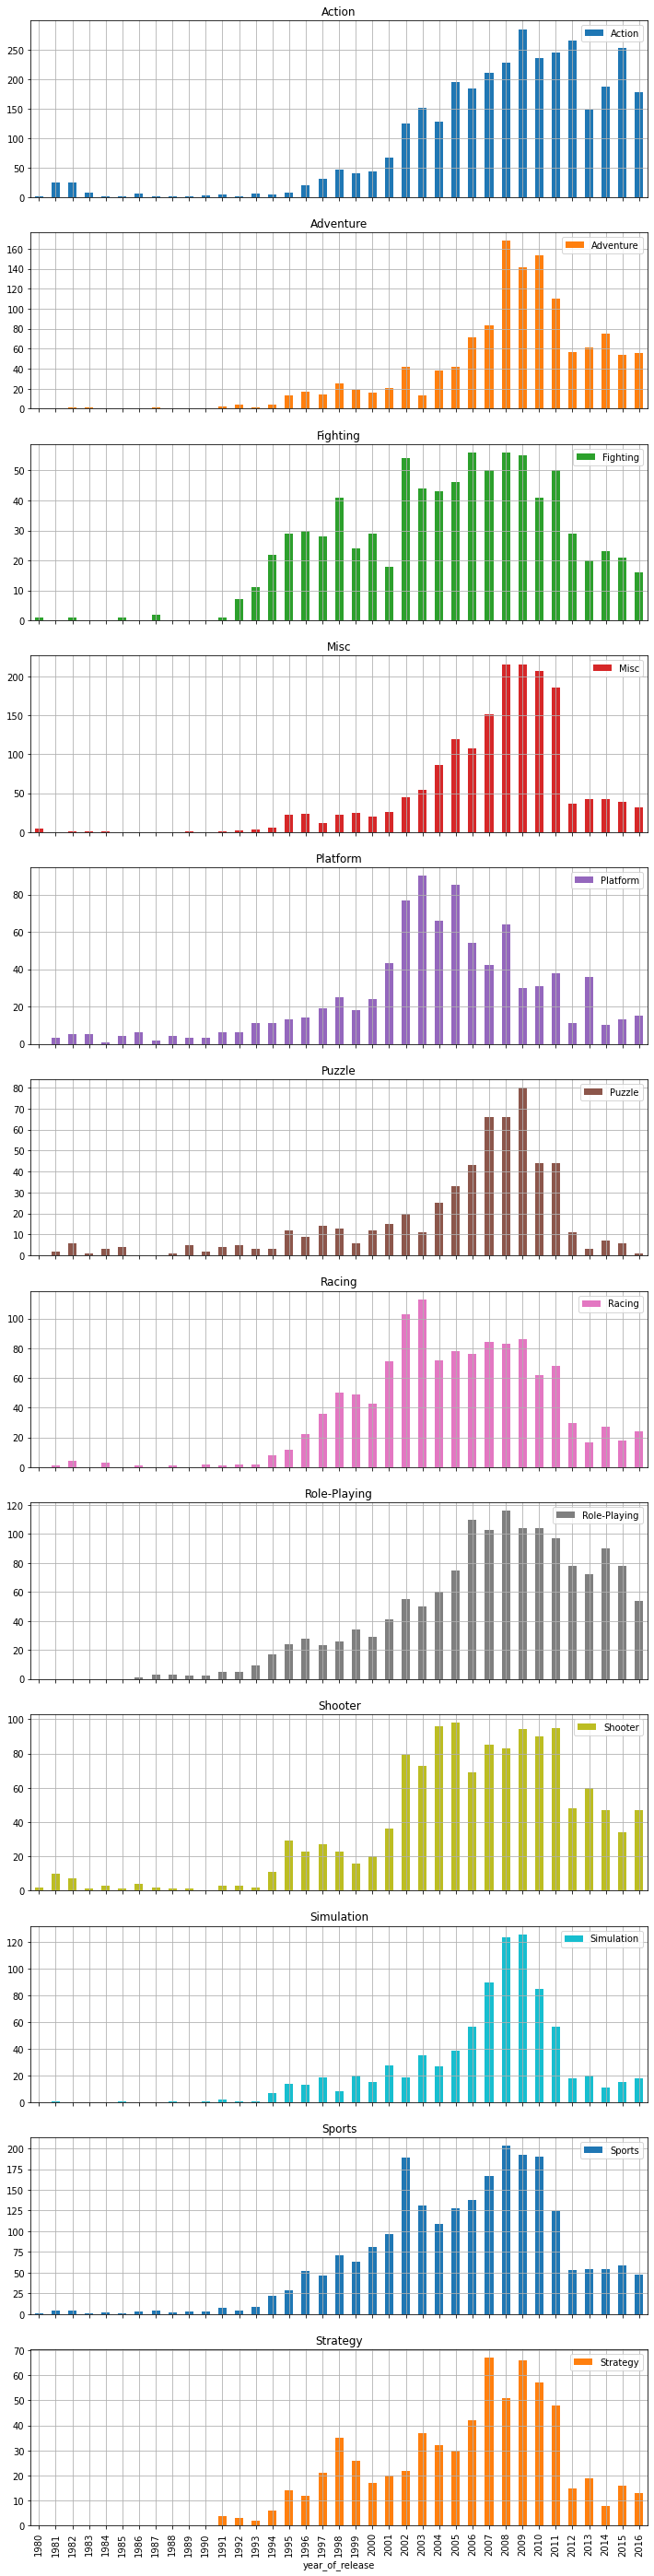

In [48]:
plt.rcParams["figure.figsize"] = (12, 50)

data.pivot_table('name', index='year_of_release', columns = 'genre', aggfunc='count').plot(kind='bar', subplots=True, grid=True);

plt.rcParams["figure.figsize"] = (12, 6)

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [49]:
cnt = pd.DataFrame({'cnt': data.groupby('platform')['total_sales'].count().sort_values(ascending=False)})
cnt_sum = data['name'].count()
cnt['cnt_part'] = cnt['cnt']/cnt_sum
print(cnt)

           cnt  cnt_part
platform                
PS2       2161      0.13
DS        2151      0.13
PS3       1330      0.08
Wii       1320      0.08
X360      1262      0.08
PSP       1209      0.07
PS        1197      0.07
PC         974      0.06
XB         824      0.05
GBA        822      0.05
GC         556      0.03
3DS        520      0.03
PSV        430      0.03
PS4        392      0.02
N64        319      0.02
XOne       247      0.01
SNES       239      0.01
SAT        173      0.01
WiiU       147      0.01
2600       133      0.01
NES         98      0.01
GB          98      0.01
DC          52      0.00
GEN         27      0.00
NG          12      0.00
SCD          6      0.00
WS           6      0.00
3DO          3      0.00
TG16         2      0.00
PCFX         1      0.00
GG           1      0.00


В качестве платформ, которые будем рассматривать в дальнейшем возьмем следующие - PS2, DS, PS3, Wii, X360, PSP, PS, PC, XB, 
GBA, GC, 3DS так как в сумме эти платформы формируют 80% общего количества игр.

Да данном шаге обнаружила значение, выглядещее аномальным: все игры платформы DS находятся в пределах 2004 - 2013 года, однако одна игра указана выпущенное в 1985 году. Данное значение, даже если не является ошибочным, сильно влияет на информцию о сроке существовани платформы. Поэтому решила исключить это решение из данного анализа.

In [50]:
data_platf = data[data['platform'].isin(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS'])]
data_platf = data_platf[((data_platf['platform'] == 'DS')&(data_platf['year_of_release'] == 1985)) == False]

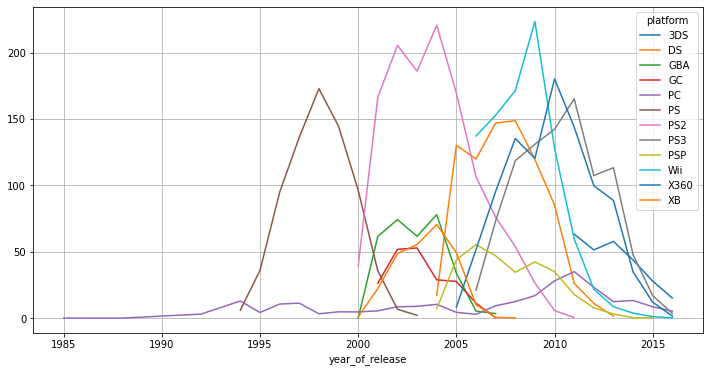

In [51]:
data_platf.pivot_table('total_sales', index='year_of_release', columns=['platform'], aggfunc='sum').plot(grid=True);

Распределения по всем платформам, кроме PC, имеют вид нормальных распределений. Распределени по PC сильно скошено слева так, что пик приходится на 2011 год, после которого вновь идет снижение.

В целом, данные график демонстрирует причины снижения количества игр в 2012-2016 годах - окончание срока существования таких крупных платформ, как DS и Wii, которые и обеспечивали основной прирост, наблюдаемый в 2008-2009 годах.

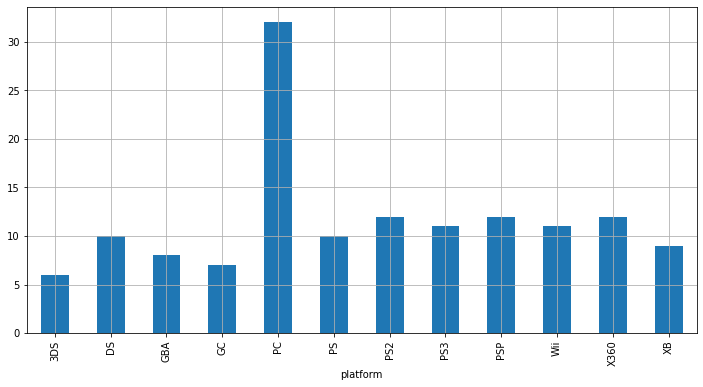

In [52]:
data_platf_life = data_platf.groupby('platform')['year_of_release'].agg(['min', 'max'])
data_platf_life['life_year'] = data_platf_life['max'] - data_platf_life['min'] + 1
data_platf_life['life_year'].plot(kind='bar', grid = True);

Средний срок существования игровой платформы в среднем составляет 10 лет. Единственное значительное исключение - PC - обладает играми напротяжении всего срока анализа. Это логично, так как, несмотря на развитие комплектующих и софта, ПК как платформа действительно не менялась на протяжении всех этих лет.

Таким образом, при выборе платформы, игры которой планируется рекламировать, следует использовать платформы, которые только начинают свое развитие.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 

### Не учитывайте в работе данные за предыдущие годы.

Как упоминалось выше, в качестве актуального периода возьмем данные за 2012-2016 года. Данные за эти года более менее устойчивы, относительно данных за 2008-2009 годы. Также на этих годах наблюдаются такие особенности, как снижение количества игр определенных жанров, что тоже следует учитывать в прогнозе. Также именно этот период предшестввует 2017 году, что несомненно важно для прогноза.

In [53]:
data_actual = data[(data['year_of_release'] >= 2012)&(data['year_of_release'] <= 2015)]

Проведем анализ платформ аналогичный предыдущему пункту, для приходящихся на актуальный период.

In [54]:
cnt = pd.DataFrame({'cnt': data_actual.groupby('platform')['name'].count().sort_values(ascending=False)})
cnt_sum = data_actual['name'].count()
cnt['cnt_part'] = cnt['cnt']/cnt_sum
print(cnt)

          cnt  cnt_part
platform               
PS3       454      0.19
3DS       358      0.15
PSV       327      0.14
X360      279      0.12
PS4       228      0.10
PC        196      0.08
PSP       173      0.07
XOne      160      0.07
WiiU      133      0.06
Wii        53      0.02
DS         31      0.01


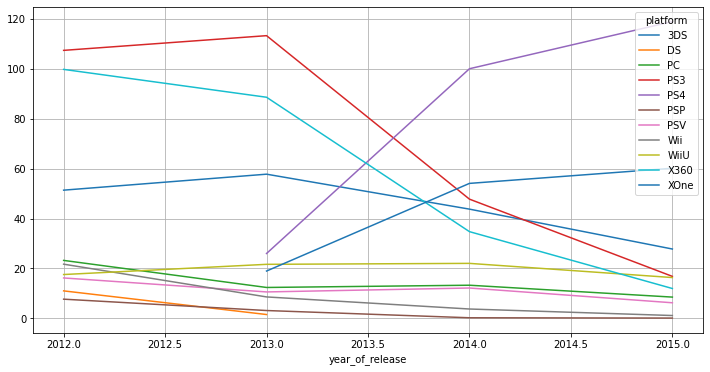

In [55]:
data_actual.pivot_table('total_sales', index='year_of_release', columns=['platform'], aggfunc='sum').plot(grid=True);

Несмотря на то, что крупнейшими платоформами являются PS3, PSV, 3DS, данные платформы снижаются и в скором будущем исчезнут из употребления.  Из развивающихся платформ, которые только набирают рост, стоит обратить внимание на PS4, XOne, которые в скором времени займу места на вершине списка. Также не стоит исключать такую платформу, как PC, поскольку она пользуется стабильной популярностью.



### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [56]:
data_actual.groupby('platform')['total_sales'].agg(['count', 'sum', 'median', 'mean', 'std']).sort_values(by='sum', ascending = False)

,count,sum,median,mean,std
platform,,,,,
PS3,454,285.19,0.23,0.63,1.52
PS4,228,244.89,0.31,1.07,1.90
X360,279,235.02,0.34,0.84,1.74
3DS,358,180.66,0.11,0.50,1.41
XOne,160,133.17,0.35,0.83,1.18
WiiU,133,77.59,0.22,0.58,1.11
PC,196,57.40,0.10,0.29,0.55
PSV,327,45.19,0.06,0.14,0.22
Wii,53,35.19,0.18,0.66,1.17


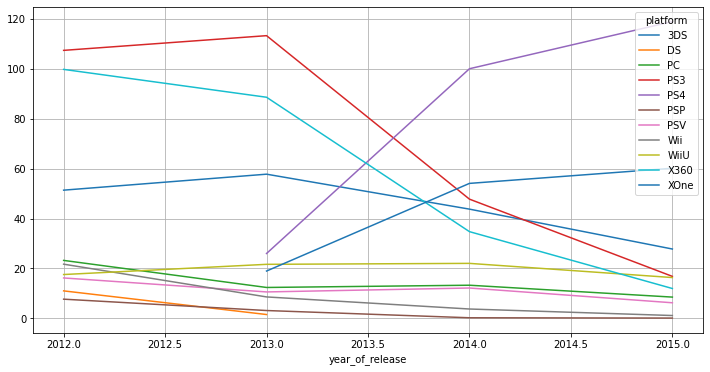

In [57]:
data_actual.pivot_table('total_sales', index='year_of_release', columns=['platform'], aggfunc='sum').plot(grid=True);

Судя по таблице, наиболее прибыльными платформами являются PS4, PS3 и X360. Однако, учитывая предыдущий анализ, следует принимать во внимание то, что платформы PS3 и X360 постепенно выходят из активного использования, и реклама игры под них может быть неперспективной - что хорошо показано на графике.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,358.00,0.50,1.41,0.01,0.05,0.11,0.33,14.60
DS,31.00,0.40,1.44,0.01,0.02,0.05,0.18,8.06
PC,196.00,0.29,0.55,0.01,0.03,0.10,0.29,5.14
PS3,454.00,0.63,1.52,0.01,0.05,0.23,0.66,21.05
PS4,228.00,1.07,1.90,0.01,0.10,0.31,1.10,14.63
PSP,173.00,0.06,0.07,0.01,0.02,0.03,0.09,0.36
PSV,327.00,0.14,0.22,0.01,0.03,0.06,0.15,1.96
Wii,53.00,0.66,1.17,0.01,0.06,0.18,0.69,6.76
WiiU,133.00,0.58,1.11,0.01,0.08,0.22,0.53,7.09


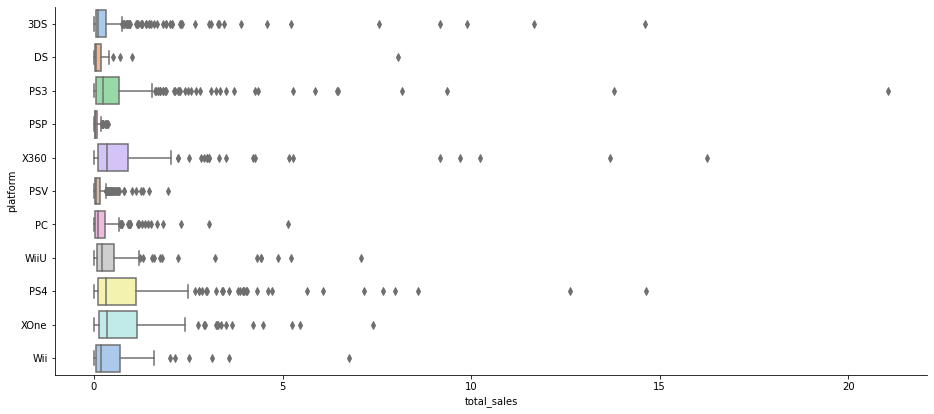

In [60]:
g = sns.catplot(y='platform', x='total_sales', kind="box", data= data_actual, orient='h', palette = 'pastel');
g.fig.set_figwidth(15)
g.fig.set_figheight(6)

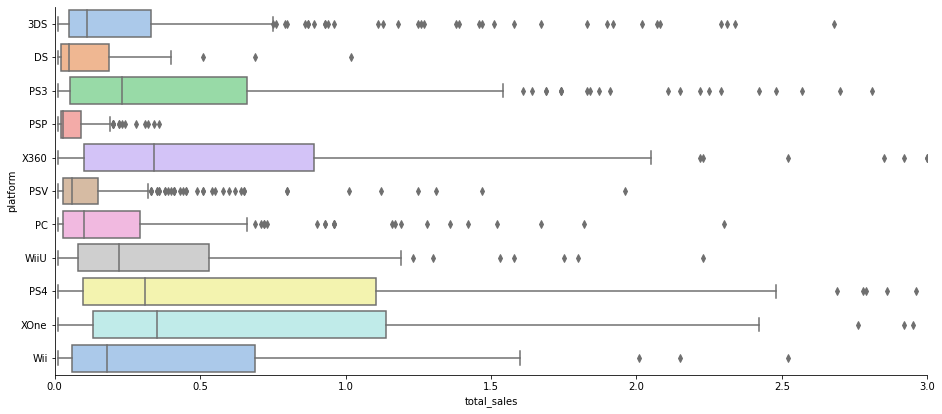

In [61]:
g1 = sns.catplot(y='platform', x='total_sales', kind="box", data= data_actual, orient='h', palette = 'pastel')
g1.set(xlim=(0, 3))
g1.fig.set_figwidth(15)
g1.fig.set_figheight(6)

In [62]:
data_actual[data_actual['total_sales'] > 10].groupby(['platform', 'name'])['total_sales'].sum()

platform  name                                     
3DS       Pokemon Omega Ruby/Pokemon Alpha Sapphire   11.68
          Pokemon X/Pokemon Y                         14.60
PS3       Call of Duty: Black Ops II                  13.79
          Grand Theft Auto V                          21.05
PS4       Call of Duty: Black Ops 3                   14.63
          Grand Theft Auto V                          12.62
X360      Call of Duty: Black Ops II                  13.68
          Call of Duty: Ghosts                        10.24
          Grand Theft Auto V                          16.27
Name: total_sales, dtype: float64

На основе полученных таблицы и графика можно сделать следующие выводы:
- На каждой платформе существуют "флагманские" игры, продажи по которым в разы отличаются от медианного значения, например GTA V и Call of Duty: BLack Ops 3 на PS3, PS4, X360 или серия Pokemon на 3DS.
- В целом, на каждой платформе присутствует большое количество значений, превышающих нормальные значения в рамках 1.5 межквартильного размаха;
- При этом, на каждой платформе выходит достаточно большое количество игр, выручка по которым небольшая, сравнительно с "флагманами"; 
- При прогнозировании продаж игр стоит ориентироваться на медианные значения и межквартильный размах на платформах, что увеличит вероятность более высоких продаж. С этой точки зрения наилучшими платформами, игры которых следует рекламировать, являются PS4, PS3, X360, XOne и Wii.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
### Соотнесите выводы с продажами игр на других платформах.

Корреляция между critic_score и total_sales для платформы PS3 составляет 0.2416876438508022
Корреляция между user_score и total_sales для платформы PS3 составляет -0.019734371275424652


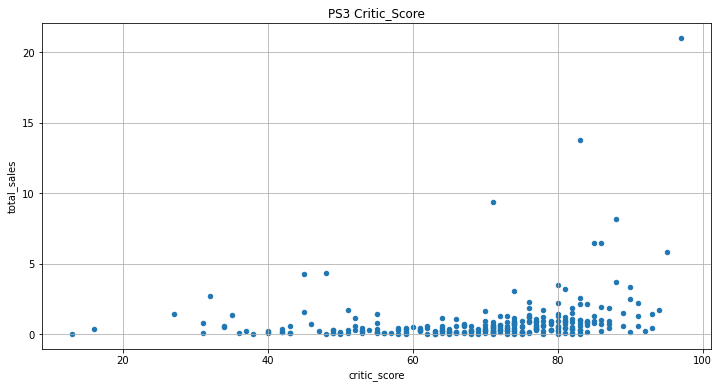

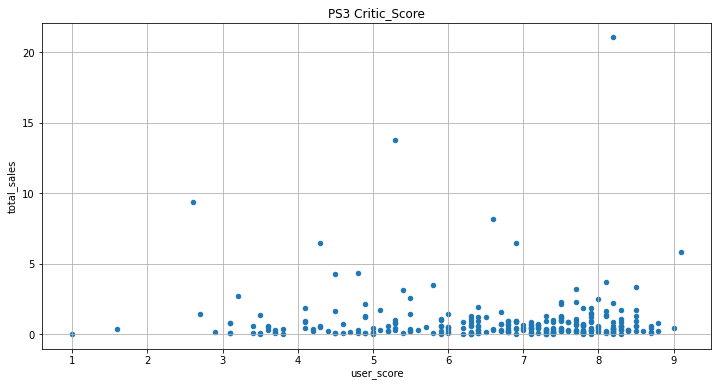

In [63]:
data_actual[data_actual['platform'] == 'PS3'].plot(x='critic_score', y='total_sales', kind='scatter', grid = True, title = 'PS3 Critic_Score');
data_actual[data_actual['platform'] == 'PS3'].plot(x='user_score', y='total_sales', kind='scatter', grid = True, title = 'PS3 Critic_Score');

corr_critic = data_actual.loc[data_actual['platform'] == 'PS3', 'critic_score'].corr(data_actual.loc[data_actual['platform'] == 'PS3', 'total_sales'])
corr_user = data_actual.loc[data_actual['platform'] == 'PS3', 'user_score'].corr(data_actual.loc[data_actual['platform'] == 'PS3', 'total_sales'])
print(f'Корреляция между critic_score и total_sales для платформы PS3 составляет {corr_critic}')
print(f'Корреляция между user_score и total_sales для платформы PS3 составляет {corr_user}')

Если рассматривать самую популярную платформу, то можно заметить наличие средней взаимосвязи между оценкой критиков и общими продажами игры - коэффициент корреляции составляет 0.24. При этом связи общих продаж игры с оценками пользователя нет - коэффициент корреляции равен -0.02. 
Рассмотрим оставшиеся платформы:

Корреляция между critic_score и total_sales для платформы PS4 составляет 0.42750196547762864
Корреляция между user_score и total_sales для платформы PS4 составляет 0.02437245076179978


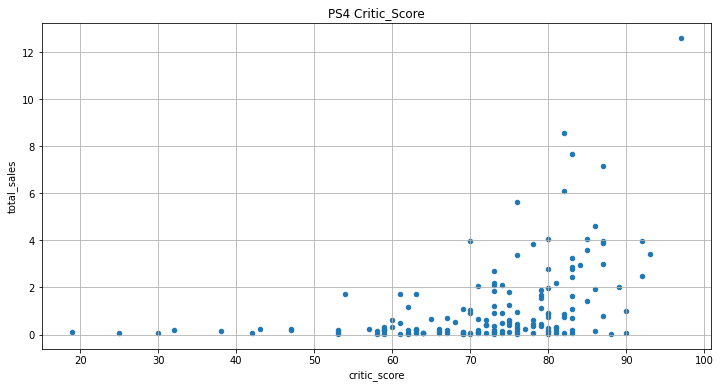

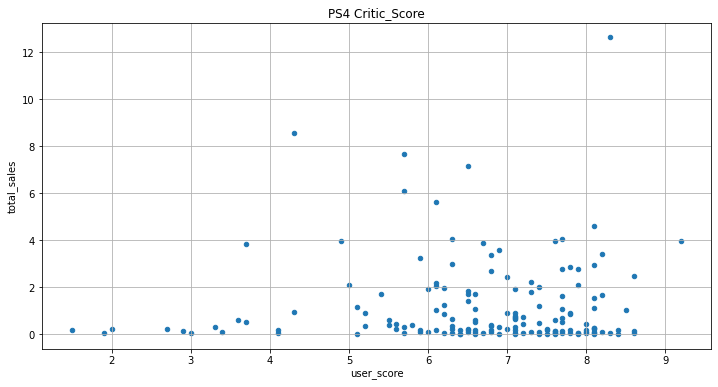

In [64]:
data_actual[data_actual['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', grid = True, title = 'PS4 Critic_Score');
data_actual[data_actual['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', grid = True, title = 'PS4 Critic_Score');

corr_critic = data_actual.loc[data_actual['platform'] == 'PS4', 'critic_score'].corr(data_actual.loc[data_actual['platform'] == 'PS4', 'total_sales'])
corr_user = data_actual.loc[data_actual['platform'] == 'PS4', 'user_score'].corr(data_actual.loc[data_actual['platform'] == 'PS4', 'total_sales'])
print(f'Корреляция между critic_score и total_sales для платформы PS4 составляет {corr_critic}')
print(f'Корреляция между user_score и total_sales для платформы PS4 составляет {corr_user}')

Корреляция между critic_score и total_sales для платформы 3DS составляет 0.3105237335466199
Корреляция между user_score и total_sales для платформы 3DS составляет 0.22888490088157656


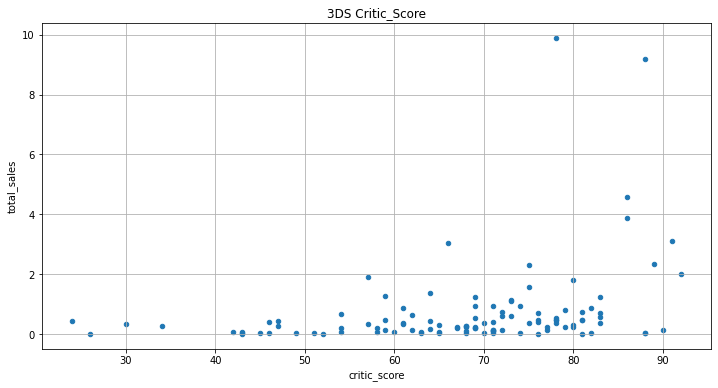

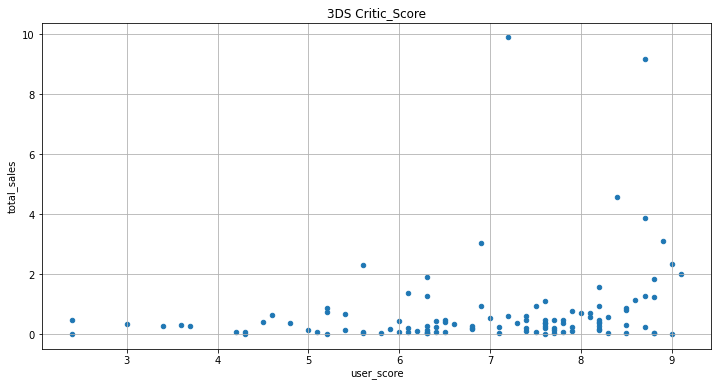

In [65]:
data_actual[data_actual['platform'] == '3DS'].plot(x='critic_score', y='total_sales', kind='scatter', grid = True, title = '3DS Critic_Score');
data_actual[data_actual['platform'] == '3DS'].plot(x='user_score', y='total_sales', kind='scatter', grid = True, title = '3DS Critic_Score');

corr_critic = data_actual.loc[data_actual['platform'] == '3DS', 'critic_score'].corr(data_actual.loc[data_actual['platform'] == '3DS', 'total_sales'])
corr_user = data_actual.loc[data_actual['platform'] == '3DS', 'user_score'].corr(data_actual.loc[data_actual['platform'] == '3DS', 'total_sales'])
print(f'Корреляция между critic_score и total_sales для платформы 3DS составляет {corr_critic}')
print(f'Корреляция между user_score и total_sales для платформы 3DS составляет {corr_user}')

Корреляция между critic_score и total_sales для платформы X360 составляет 0.2911562266008984
Корреляция между user_score и total_sales для платформы X360 составляет -0.009605025034522955


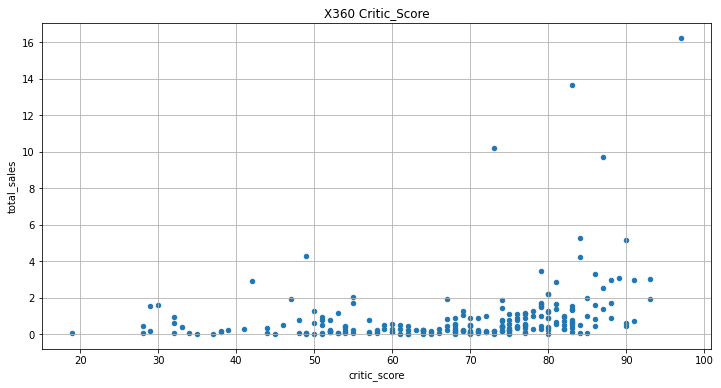

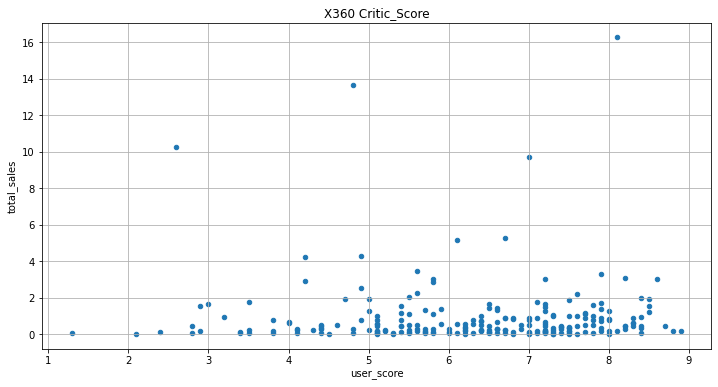

In [66]:
data_actual[data_actual['platform'] == 'X360'].plot(x='critic_score', y='total_sales', kind='scatter', grid = True, title = 'X360 Critic_Score');
data_actual[data_actual['platform'] == 'X360'].plot(x='user_score', y='total_sales', kind='scatter', grid = True, title = 'X360 Critic_Score');

corr_critic = data_actual.loc[data_actual['platform'] == 'X360', 'critic_score'].corr(data_actual.loc[data_actual['platform'] == 'X360', 'total_sales'])
corr_user = data_actual.loc[data_actual['platform'] == 'X360', 'user_score'].corr(data_actual.loc[data_actual['platform'] == 'X360', 'total_sales'])
print(f'Корреляция между critic_score и total_sales для платформы X360 составляет {corr_critic}')
print(f'Корреляция между user_score и total_sales для платформы X360 составляет {corr_user}')

Корреляция между critic_score и total_sales для платформы XOne составляет 0.4596996600660834
Корреляция между user_score и total_sales для платформы XOne составляет -0.028192590814915052


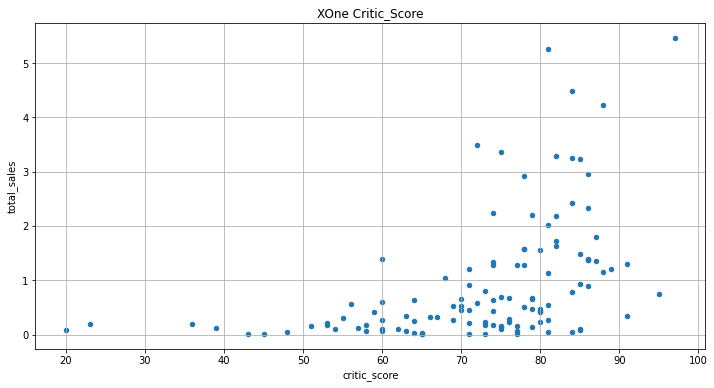

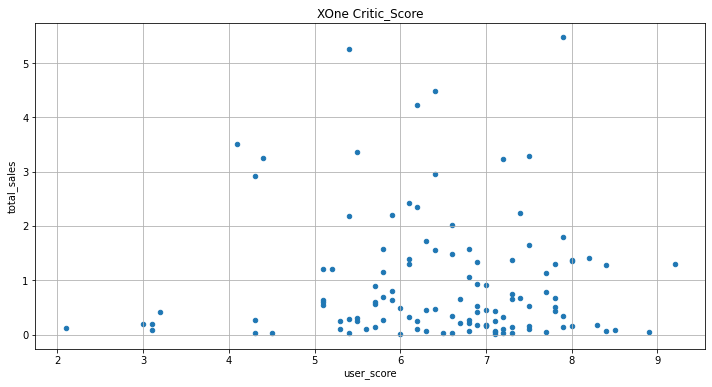

In [67]:
data_actual[data_actual['platform'] == 'XOne'].plot(x='critic_score', y='total_sales', kind='scatter', grid = True, title = 'XOne Critic_Score');
data_actual[data_actual['platform'] == 'XOne'].plot(x='user_score', y='total_sales', kind='scatter', grid = True, title = 'XOne Critic_Score');

corr_critic = data_actual.loc[data_actual['platform'] == 'XOne', 'critic_score'].corr(data_actual.loc[data_actual['platform'] == 'XOne', 'total_sales'])
corr_user = data_actual.loc[data_actual['platform'] == 'XOne', 'user_score'].corr(data_actual.loc[data_actual['platform'] == 'XOne', 'total_sales'])
print(f'Корреляция между critic_score и total_sales для платформы XOne составляет {corr_critic}')
print(f'Корреляция между user_score и total_sales для платформы XOne составляет {corr_user}')

Выдвинутое предположение о существовании взаимосвязи между общими продажами и оценкой критиков подтверждается и для других платформ - коэффициенты корреляции находятся в диапазоне 0.30-0.45. Также замечены следующие моменты:
- На платформах нового поколения корреляции (PS4, XOne) сильнее, чем на платформах старого поколения 0.42 и 0.45 против 0.3 - это можно объяснить тем, что игры на данных платформах дороже, поэтому потребители больше ориентируются на критику при покупке игр.
- На большей части платформ (PS3, PS4, X360, XOne) оценка пользователей вообще никак не влияет на продажи игр - корреляция около 0. При этом на платформе 3DS она составляет 0.23. Это выделяет данную платформу из списка.

Таким образом, при позиционировании игр на всех основных платформах, следует обращать внимание на оценки критиков.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

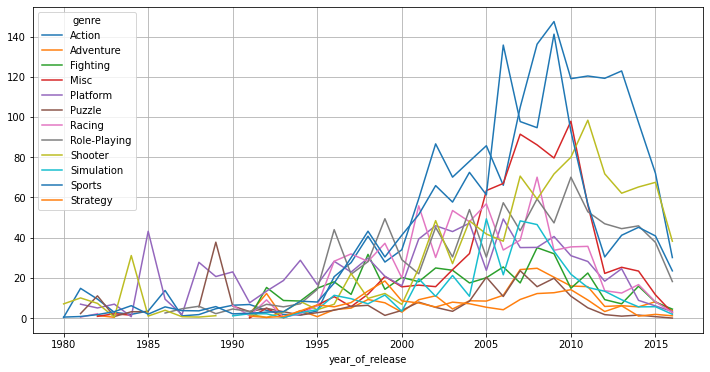

In [68]:
data.pivot_table('total_sales', index='year_of_release', columns=['genre'], aggfunc='sum').plot(grid=True);

In [69]:
data_genre_stat = data_actual.groupby('genre')['total_sales'].describe()
data_genre_stat['sum'] = data_actual.groupby('genre')['total_sales'].sum()
data_genre_stat.sort_values(by = 'sum', ascending = False)

,count,mean,std,min,25%,50%,75%,max,sum
genre,,,,,,,,,
Action,854.00,0.48,1.27,0.01,0.04,0.14,0.44,21.05,411.41
Shooter,189.00,1.41,2.42,0.01,0.18,0.51,1.57,14.63,266.58
Role-Playing,318.00,0.55,1.36,0.01,0.06,0.15,0.50,14.60,174.91
Sports,220.00,0.72,1.13,0.01,0.09,0.31,0.79,8.58,157.60
Misc,160.00,0.52,1.17,0.01,0.05,0.18,0.40,9.18,82.44
Platform,70.00,0.83,1.47,0.01,0.09,0.29,1.02,9.90,57.77
Racing,92.00,0.55,0.97,0.01,0.06,0.23,0.56,7.09,50.80
Fighting,93.00,0.43,0.97,0.01,0.06,0.16,0.38,7.55,40.02
Simulation,64.00,0.53,1.38,0.01,0.05,0.16,0.36,9.17,33.72


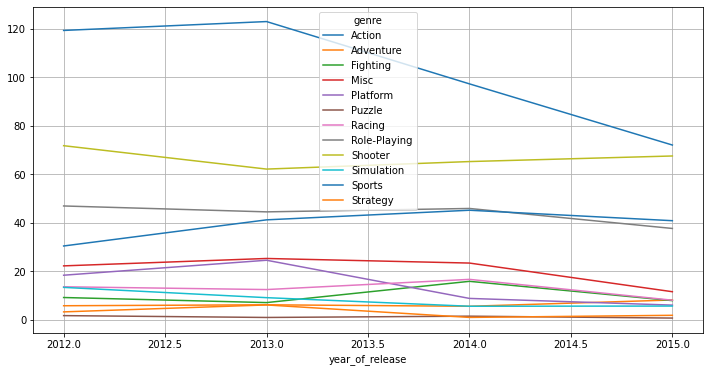

In [70]:
data_actual.pivot_table('total_sales', index='year_of_release', columns=['genre'], aggfunc='sum').plot(grid=True);

Самыми прибыльными жанрами являются Action, Shooter, Role-Playing, Sports и Misc.

Жанрами с самыми низкими продажами являются Puzzle, Strategy и Adventure. При этом это подобные лидеры сложились только начиная с 2000х годов, прежде в лидеры выходили самые разные жанры.

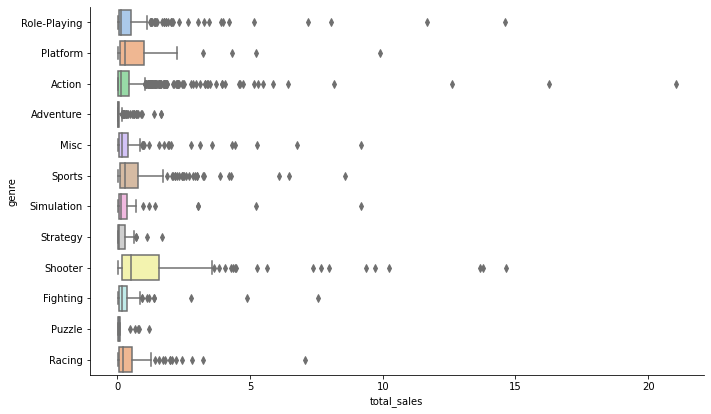

In [71]:
g = sns.catplot(y='genre', x='total_sales', kind="box", data= data_actual, orient='h', palette = 'pastel')
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

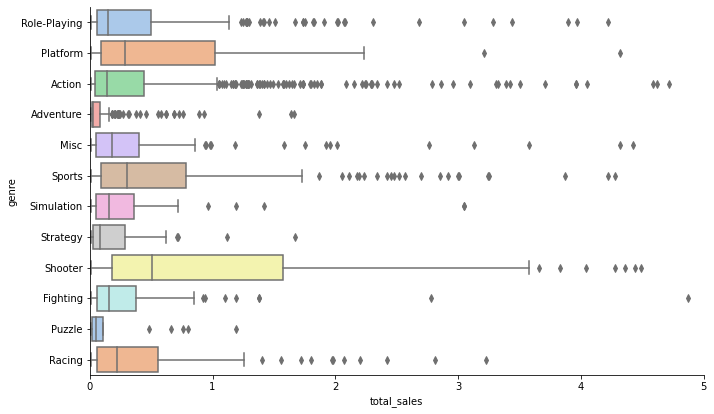

In [72]:
g = sns.catplot(y='genre', x='total_sales', kind="box", data= data_actual, orient='h', palette = 'pastel')
g.set(xlim=(0,5))
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

In [73]:
data_actual[data_actual['total_sales'] > 5].groupby(['genre', 'name'])['total_sales'].sum()

genre         name                                     
Action        Assassin's Creed III                        11.73
              FIFA Soccer 13                              13.33
              Grand Theft Auto V                          55.41
              The Last of Us                               5.86
Fighting      Super Smash Bros. for Wii U and 3DS          7.55
Misc          Just Dance 4                                 6.76
              Minecraft                                   14.45
Platform      New Super Mario Bros. 2                      9.90
              New Super Mario Bros. U                      5.23
Racing        Mario Kart 8                                 7.09
Role-Playing  Diablo III                                   5.14
              Fallout 4                                    7.17
              Pokemon Black 2/Pokemon White 2              8.06
              Pokemon Omega Ruby/Pokemon Alpha Sapphire   11.68
              Pokemon X/Pokemon Y               

При этом, если посмотреть на распределения продаж игр по жанрам, то в самом распространеном жанре Action значительная доля выбросов, выходящим за нормальные значения, а также дотаточно близки значения первого квартиля и медианы и в целом малый межквартильный размах. Это может говорить о множестве игр жанра Action, которые имеют сравнительно низкие продажи. При этом основную выручку приносят меньшая доля флагманских игр.

В целом, по всем жанрам распределения скошены вправо. Наиболее лучшими жанрами с этой точки зрения являются Shooter, Platform, Sport - медиана по ним превосходит медианы по прочим жанрам, а также межквартильный размах по ним больше. Это обеспечит более высокую вероятность хорошей выручки, чем по прочим жанрам.

Если рассматривать не абсолютные продажи, а средние значения и медианы, то приоритетными жанрами явлются Shooter, Platform и Sports. Продажи по этим жанрам за 2012-2015 года в среднем выше, чем по другим жанрам и из этого следует, что реклама игр этих жанров необходимо уделять особое внимание.

In [74]:
data_actual.pivot_table('total_sales', index='genre', columns='platform', aggfunc='sum').fillna(0)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,40.74,1.82,12.59,114.74,81.25,3.76,14.46,10.75,17.27,81.12,32.91
Adventure,3.89,0.06,0.65,5.91,4.15,1.67,3.27,0.19,0.16,3.24,2.51
Fighting,8.43,0.00,0.07,10.85,5.91,0.36,2.09,0.00,5.26,4.97,2.08
Misc,8.95,0.48,0.73,8.66,7.59,0.41,4.11,17.68,11.69,14.79,7.35
Platform,18.81,0.69,0.08,4.15,5.53,0.00,2.26,2.25,21.31,2.04,0.65
Puzzle,2.66,0.10,0.03,0.04,0.02,0.00,0.05,0.66,1.32,0.00,0.00
Racing,0.37,0.00,1.11,11.56,10.95,0.00,2.21,0.01,7.87,8.41,8.31
Role-Playing,70.97,9.08,13.22,22.16,23.01,2.81,11.10,1.06,2.47,9.80,9.23
Shooter,0.20,0.00,12.36,60.37,64.37,0.00,2.34,0.00,5.64,72.66,48.64


Если рассматривать соотношение между жанрами и платформами по общим продажам, то можно обратить внимание на следующие моменты:
- На платформе 3DS наибольшу выручку приносят игры жанра Role-Playing, на втором месте жанр Action. При этом 3DS составляет 40% рынка Role-Playing во всем мире.
- На платформах PS3, PS4, X360, XOne основными жанрами являются Action, Shooter и Sports.
- Лидером по жанру Misc (прочее) является платформа Wii.

<b>Общие выводы по разделу</b>:
- Для прогнозирования 2017 года следует использовать период с 2012 по 2015 года, так как:
    - Эти периоды непосредственно предшествуют прогнозируемому 2017 году
    - На этих периодах наблюдается одинаковая динамика в продажах, в сравнении с предыдущими периодами (2008-2010 года)
    - Именно в рамках этого периода происходит такой процесс, как выход из использования старых платформ и начало использования новых
    - 2016 год исключается, так как продажи по нему занижены из-за того, что игры, выпущенные в 2016 году находятся на начале тренда роста своих продаж.
- Наиболее перспективными платформами являются PS4 и XOne, так как они являются платформами только наичнающими свое развитие. Также не стоит исключать из внимания такие платформы, как 3DS и PC, так как 3DS начал снижение своих продаж, но еще далек от прекращения использования, а PC обладает устойчивой востребованностью.
- Наиболее популярными жанрами являются Action, Shooter и Role-playing. При этом, жанры Action имеет наибольшие продажи на платформах PS4, 3DS; Shooter - на платформах PD4 и XOne; Role-playing - на 3DS. На платформе PC наиболее поплярными жанрами также являются Action, Shooter и Role-playing.
- Жанры Action и Role-playing, больше, чем жанр Shooter, ориентируется на флагманы продаж. Большая часть игр этих жанров (до 75%) имеют сравнительно низкие продажи. Случайная игра жанра Shooter с большей вероятностью будет иметь лучшие продажи. Из этого следует, что для игр, только выходящих на рынок, лучше ориентироваться в рекламе на Shooter нежели на Action или Role-playing. Для Action и Role-playing лучше рекламировать уже проверенные игры.
- Следует обращать внимание на отзывы критиков при выборе игр, на которых будет направлена реклама. Для игр на платформе 3DS также следует обращать внимание на пользовательский рейтинг.

## Шаг 4. Составление портрета пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователей каждого региона (NA, EU, JP). Опишите различия в долях продаж.

In [75]:
print(data_actual.pivot_table(['na_sales'], index=['platform'], aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5));
print('------------')
print(data_actual.pivot_table(['eu_sales'], index=['platform'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5));
print('------------')
print(data_actual.pivot_table(['jp_sales'], index=['platform'], aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5));

          na_sales
platform          
X360        139.36
PS3         102.71
PS4          87.25
XOne         78.85
3DS          52.01
------------
          eu_sales
platform          
PS4         109.31
PS3         105.60
X360         73.81
XOne         41.96
3DS          40.52
------------
          jp_sales
platform          
3DS          79.81
PS3          33.99
PSV          17.55
WiiU         12.34
PSP          10.47


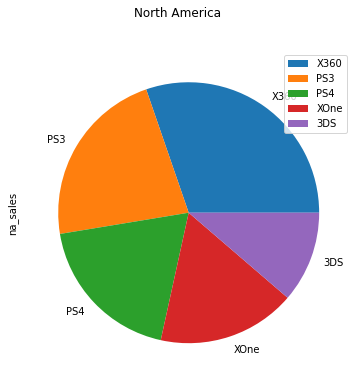

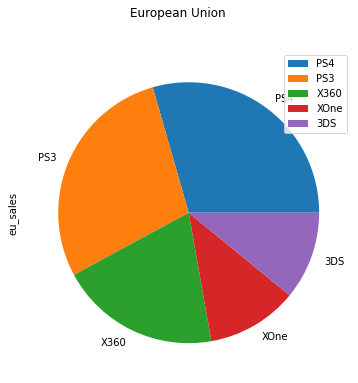

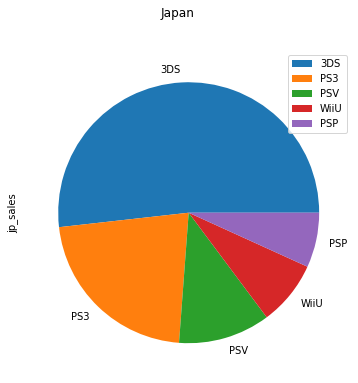

In [76]:
data_actual.pivot_table(['na_sales'], index=['platform'], aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', subplots=True, title='North America');
data_actual.pivot_table(['eu_sales'], index=['platform'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', subplots=True, title='European Union');
data_actual.pivot_table(['jp_sales'], index=['platform'], aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', subplots=True, title='Japan');


Профили пользователей по платформам между Северной Америкой и Евросоюзом практически совпадают. Игроки из этих регионов выбирают платформы Xbox и PlayStation, а также, в меньшей степени, 3DS. В Японии же на вершине рейтинга находится 3DS, PS3, PSV, WiiU и PSP. 

Из этого следует, что в странах Северной Америки и Европы преобладают стационарные игровые приставки, а в Японии - портативные. 

### Самые популярные жанры (топ-5) для пользователей каждого региона (NA, EU, JP). Поясните разницу.

In [77]:
print(data_actual.pivot_table(['na_sales'], index=['genre'], aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5));
print('------------')
print(data_actual.pivot_table(['eu_sales'], index=['genre'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5));
print('------------')
print(data_actual.pivot_table(['jp_sales'], index=['genre'], aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5));

              na_sales
genre                 
Action          168.73
Shooter         128.57
Sports           73.99
Role-Playing     58.22
Misc             37.43
------------
              eu_sales
genre                 
Action          148.85
Shooter          97.59
Sports           57.08
Role-Playing     44.30
Misc             25.66
------------
              jp_sales
genre                 
Role-Playing     58.93
Action           45.73
Misc             11.82
Simulation       10.08
Fighting          8.69


Рейтинги Северной Америки и Евросоюза по жанрам полностью совпадают. В них находятся жанры Action, Shooter, Sports, Role-Playing и Misc. Рейтинг Японии состоит из Role-Playing, Action, Misc, Simulation и Fighting.

Можно наблюдать связь между популярными платформами и популярными жанрами - жанры Action и Shooter лучше всего продаются на приставках XBox и PlayStation. А на 3DS, особенно популярном в Японии, как раз преобладают жанры Role-Playing и Action. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [78]:
data_actual['rating_num'] = 0
data_actual.loc[data_actual['rating'] == 'E', 'rating_num'] = 1
data_actual.loc[data_actual['rating'] == 'E10+', 'rating_num'] = 2
data_actual.loc[data_actual['rating'] == 'T', 'rating_num'] = 3
data_actual.loc[data_actual['rating'] == 'M', 'rating_num'] = 4


In [79]:
data_stat = data_actual.pivot_table(['na_sales', 'eu_sales', 'jp_sales'], index=['rating_num', 'rating'], aggfunc='sum')
na_sales = data_actual['na_sales'].sum()
eu_sales = data_actual['eu_sales'].sum()
jp_sales = data_actual['jp_sales'].sum()

data_stat['na_sales_part'] = data_stat['na_sales']/na_sales
data_stat['eu_sales_part'] = data_stat['eu_sales']/eu_sales
data_stat['jp_sales_part'] = data_stat['jp_sales']/jp_sales

data_stat

,,eu_sales,jp_sales,na_sales,na_sales_part,eu_sales_part,jp_sales_part
rating_num,rating,,,,,,
0,RP,84.03,94.57,95.06,0.17,0.18,0.55
1,E,99.44,27.26,106.52,0.19,0.22,0.16
2,E10+,51.75,7.74,72.15,0.13,0.11,0.04
3,T,43.22,23.82,57.36,0.10,0.09,0.14
4,M,177.42,20.00,215.90,0.39,0.39,0.12


<AxesSubplot:xlabel='rating_num,rating'>

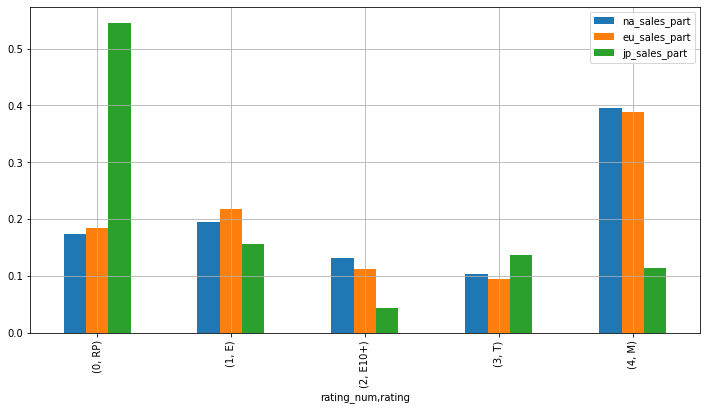

In [80]:
data_stat[['na_sales_part', 'eu_sales_part', 'jp_sales_part']].plot(kind='bar', grid=True)

Сильное влияние рейтинг оказывает на страны Северной Америки и Евросоюза - в этих регионах преобладают игры жанра Mature (для взрослых), они составляют 40% от всех продаж. В Японии же рейтинг явно не влияет на доли продаж. С другой стороны в Японии у значительного количества игр отсутствует проставленный рейтинг (55% игр).

На основании этого нельзя сказать чего-либо конкретного о влиянии рейтинга на продажу игр в Японии, при этом влияние на продажу игр в Северной Америке и Евросоюзе рейтинг имеет.

<b>На основе проведенного анализа можно составить следующие портреты пользователей по странам:</b>
- <b>Северная Америка</b> - игрокам из Северной Америки лучше предлагать игры жанров Action или Shooter на платформах PS4 или XOne c рейтингом M.
- <b>Евросоюз</b> - игрокам из Евросоюза лучше предлагать игры жанров Action или Shooter на платформах PS4 или XOne c рейтингом M.
- <b>Япония</b> - игрокам из Японии лучше предлагать игры жанров Role-Playing или Action на платформе 3DS без учета рейтинга.

Можно сделать вывод (если предполагать, что возраст покупателя и игрока совпадают), что игроки из Северной Америки и Европы предпочитают играть на стационарных игровых приставках дома в игры, которые не требуют сильного вовлечения в сюжет или необходимости принимать решения по ходу игры, однако требуют внимания "в текущий момент" (игры жанра Action, Shooter или Sport). Также эти игроки преимущественно старше 17 лет.

Игроки из Японии предпочитают играть в игры на портативных консолях, отдавая предпочтение играм жанра Role-Playing или Action, что говорит о сильной вовлеченности как в сюжет игр (Role-Playing), так и в игровой процесс (Action). О возрасте этих игроков сложно говорить, поэтому нет смысла каким-либо образом обращать внимание на рейтинг при рекламе на японском рынке.

## Шаг 5. Проверка гипотезы

Пороговое значение alpha задайте самостоятельно.

Описать:
- как были сформулированы нулевая и альтернативная гипотезы;
- какой критерий использовали для проверки гипотез и почему.


In [81]:
alpha = .05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

<b>H0</b>: в качестве нулевой гипотезы возьмем утверждение, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
    
<b>H1</b>: тогда в качестве альтернативной гипотезой можно взять утверждение, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Прежде всего сравним распределение средних пользовательских рейтингов платформ Xbox One и PC.

Результаты по пользователям для разных платформ очень похожи, учитывая значения средних и стандартных отклонений. 

In [82]:
data_actual.loc[data_actual['platform'].isin(['XOne', 'PC'])].groupby('platform')['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,162.00,6.47,1.64,1.40,5.50,6.80,7.70,9.30
XOne,118.00,6.46,1.29,2.10,5.72,6.65,7.30,9.20


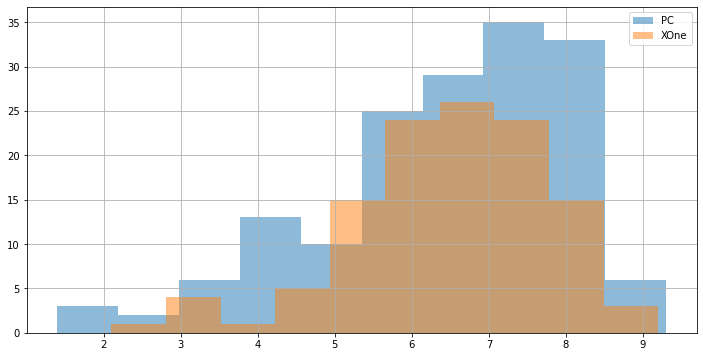

In [83]:
data_actual.loc[data_actual['platform'].isin(['XOne', 'PC'])].groupby('platform')['user_score'].hist(alpha=0.5, legend = True);

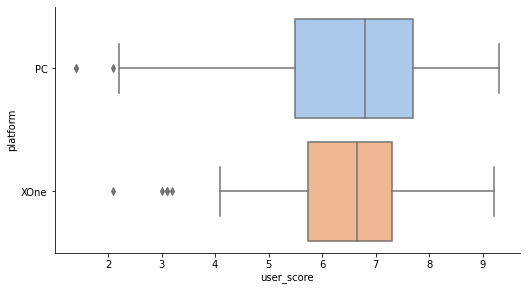

In [84]:
g = sns.catplot(y='platform', x='user_score', kind="box", data= data_actual.loc[data_actual['platform'].isin(['XOne', 'PC'])], orient='h', palette = 'pastel')
g.fig.set_figwidth(8)
g.fig.set_figheight(4)

In [85]:
data_pc = data_actual.loc[(data_actual['platform'] == 'PC')&(data_actual['user_score'].isna() == False), 'user_score'].sample(118)
data_xone = data_actual.loc[(data_actual['platform'] == 'XOne')&(data_actual['user_score'].isna() == False), 'user_score'].sample(118)

In [86]:
results = st.ttest_ind(data_pc, data_xone)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отбрасываем нулевую гипотезу")
else:
    print("Отбрасываем альтернативную гипотезу")

p-значение:  0.4947151275863009
Отбрасываем альтернативную гипотезу


Проинтерпретируем полученные результаты с точки зрения статистики.
<b>p-value</b> - в данном случае, это вероятность того, что при истинности нулевой гипотезы, сравниваемые выборки были взяты из совокупностей с одинаковыми метрками. Если <b>p-value</b> меньше некоторго уровня значимости (<i>alpha</i> = 5%), то скорее всего данные выборки были взяты из совокупностей с разными метриками и тогд нулевую гипотезу можно отбросить. Иными словами <b>p-value</b> это вероятность ошибки при отклонении нулевой гипотезы.

Сравнение средних пользовательских рейтингов платформ Xbox One и PC - p-значение:  0.69. Это означает, что вероятность, что выборки для платформы Xbox One и платформы PC взяты из совокупностей с одинаковыми метриами, равна 69%, что гораздо больше определенного нами уровня значимости 5%. И это означает, что отбрасывание нулевой гипотезы будет ошибочно с вероятностью 69%. Из этого следует, что мы можем отбросить альтернативную гипотезу о различии средних пользовательских рейтингов. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b>H0</b>: в качестве нулевой гипотезы возьмем утверждение, что средние пользовательские рейтинги жанров Action и Sport одинаковые. 
    
<b>H1</b>: тогда в качестве альтернативной гипотезой можно взять утверждение, что средние пользовательские рейтинги жанров Action и Sport различаются.

Прежде всего сравним распределение средних пользовательских рейтингов жанров Action и Sport

Результаты по пользователям для разных платформ на первый взгляд похожи, однако посмотреть на гистограммы и boxplot, то легко увидеть сильную разницу в распределениях.

In [87]:
data_actual.loc[data_actual['genre'].isin(['Action', 'Sports'])].groupby('genre')['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,443.00,6.85,1.35,1.60,6.30,7.20,7.80,9.10
Sports,159.00,5.44,1.67,1.40,4.30,5.70,6.80,8.80


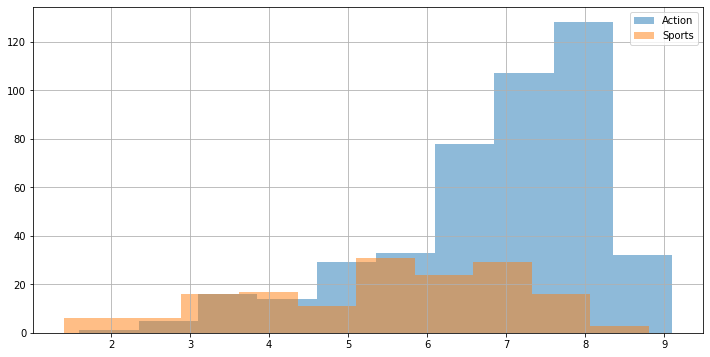

In [88]:
data_actual.loc[data_actual['genre'].isin(['Action', 'Sports'])].groupby('genre')['user_score'].hist(alpha=0.5, legend = True);

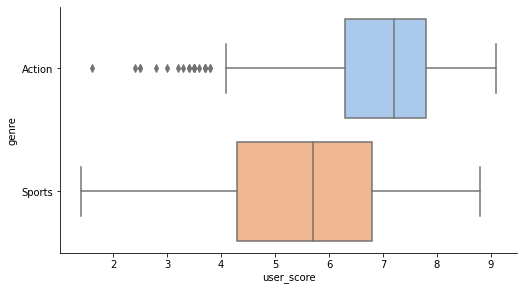

In [89]:
g = sns.catplot(y='genre', x='user_score', kind="box", data= data_actual.loc[data_actual['genre'].isin(['Action', 'Sports'])], orient='h', palette = 'pastel')
g.fig.set_figwidth(8)
g.fig.set_figheight(4)

In [90]:
data_action = data_actual.loc[(data_actual['genre'] == 'Action')&(data_actual['user_score'].isna() == False), 'user_score'].sample(159)
data_sport = data_actual.loc[(data_actual['genre'] == 'Sports')&(data_actual['user_score'].isna() == False), 'user_score'].sample(159)

In [91]:
results = st.ttest_ind(data_action, data_sport)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отбрасываем нулевую гипотезу")
else:
    print("Отбрасываем альтернативную гипотезу")

p-значение:  1.6881902045514906e-14
Отбрасываем нулевую гипотезу


Проинтерпретируем полученные результаты с точки зрения статистики.
<b>p-value</b> - в данном случае, это вероятность того, что при истинности нулевой гипотезы, сравниваемые выборки были взяты из совокупностей с одинаковыми метрками. Если <b>p-value</b> меньше некоторго уровня значимости (<i>alpha</i> = 5%), то скорее всего данные выборки были взяты из совокупностей с разными метриками и тогд нулевую гипотезу можно отбросить. Иными словами <b>p-value</b> это вероятность ошибки при отклонении нулевой гипотезы.

Сравнение средних пользовательских рейтингов жанров Action и Sport - p-значение:  2.07e-15. Это означает, что вероятность, что выборки для жанра Action и жанра Sport взяты из совокупностей с одинаковыми метриами, равна 2 * 10^-15 %, что гораздо меньше определенного нами уровня значимости 5%. И это означает, что отбрасывание нулевой гипотезы будет ошибочно с вероятностью 2 * 10^-15 %. Из этого следует, что мы можем отбросить нулевую гипотезу о равенстве средних пользовательских рейтингов. 

## Шаг 6. Общий вывод

<b>Подведем общие выводы</b>:
В ходе подготовки данных были выполнены следующие действия:
- названия столбцоы были приведены к единому регистру - названия состоят только из строчных букв;
- были полностью устранены пропущенные значения в колонках name, year_of_Release, genre, rating;
- были частично устранены пропущенные значения в столбцах critic_score, user_score;
- были изменены типы столбцоы <i>year_of_release</i> на int и <i>user_score</i> на float;
- общая доля исключенных записей составляет 0,01%, что является допустимым количеством;
- добавлено поле <i>total_sales</i> - содержащее суммарные продажи по всем регионам.

В ходе проведения анализа данных были выполнены следующие действия:
- Для прогнозирования 2017 года следует использовать период с 2012 по 2015 года, так как:
    - Эти периоды непосредственно предшествуют прогнозируемому 2017 году
    - На этих периодах наблюдается одинаковая динамика в продажах, в сравнении с предыдущими периодами (2008-2010 года)
    - Именно в рамках этого периода происходит такой процесс, как выход из использования старых платформ и начало использования новых
    - 2016 год исключается, так как продажи по нему занижены из-за того, что игры, выпущенные в 2016 году находятся на начале тренда роста своих продаж.
- Наиболее перспективными платформами являются PS4 и XOne, так как они являются платформами только наичнающими свое развитие. Также не стоит исключать из внимания такие платформы, как 3DS и PC, так как 3DS начал снижение своих продаж, но еще далек от прекращения использования, а PC обладает устойчивой востребованностью.
- Наиболее популярными жанрами являются Action, Shooter и Role-playing. При этом, жанры Action имеет наибольшие продажи на платформах PS4, 3DS; Shooter - на платформах PD4 и XOne; Role-playing - на 3DS. На платформе PC наиболее поплярными жанрами также являются Action, Shooter и Role-playing.
- Жанры Action и Role-playing, больше, чем жанр Shooter, ориентируется на флагманы продаж. Большая часть игр этих жанров (до 75%) имеют сравнительно низкие продажи. Случайная игра жанра Shooter с большей вероятностью будет иметь лучшие продажи. Из этого следует, что для игр, только выходящих на рынок, лучше ориентироваться в рекламе на Shooter нежели на Action или Role-playing. Для Action и Role-playing лучше рекламировать уже проверенные игры.
- Следует обращать внимание на отзывы критиков при выборе игр, на которых будет направлена реклама. Для игр на платформе 3DS также следует обращать внимание на пользовательский рейтинг.
- <b>Северная Америка</b> - игрокам из Северной Америки лучше предлагать игры жанров Action или Shooter на платформах PS4 или XOne c рейтингом M.
- <b>Евросоюз</b> - игрокам из Евросоюза лучше предлагать игры жанров Action или Shooter на платформах PS4 или XOne c рейтингом M.
- <b>Япония</b> - игрокам из Японии лучше предлагать игры жанров Role-Playing или Action на платформе 3DS без учета рейтинга.

Cтатистический анализ выявил следующие закономерности:
- Средние пользовательские рейтинги средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги cредние пользовательские рейтинги жанров Action и Sport отличаются

Рекомендации по выбору успешных игр:
- При выборе игр, следует обратить на игры, выпускаемые на платформах нового поколения - PS4 и XOne, персональных компьютерах и портативной приставке 3DS.
- Из жанров следует обратить внимание на игры жанра Action, Shooter и Role-Playing. Причем, для рекламы Action и Role-Playing следует выбирать игры известных серий или производителей, среди Shooter можно вкладываться в рекламу и малоизвестных новинок - для оценок этого нужен более глубокий анализ на более детальных данных.
- При рекламе, ориентированной на игроков Северной Америки и Евросоюза, следует больше внимания уделять платфорам PS4 и XOne и жанрам Action и Shooter. При рекламе, ориентированной на Японию, следует уделить влияние играм на портативных консолях в жанрах Role-Playing и Action.